# 1D Truck Simulation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from DumbTruck import DumbTruck
from kalmanfilter import KalmanFilter

### Set parameters & generate data

In [7]:
t = 50 # number of time steps to run
dt = 0.1 # time step
k = 0.1 # friction coefficient for data generation
ep = 0.5 # process noise variation
nu = 0.4 # measurement noise variation (both position and velocity)
initial = np.array([[1],[1]])

gen = DumbTruck(initial, t, dt, k, ep, nu)
process = gen.process()
measure = gen.measure(process)


### Run Kalman filter

In [8]:
output = np.array([[], []])
filter = KalmanFilter(initial, dt, k, ep - .5, nu, nu)
for i in range(t+1):
    measure_t = measure[:,i]
    measure_t.shape = (2,1)
    filter.predict(measure_t)
    kalman_output = filter.get_current_guess()
    output = np.append(output, kalman_output, axis=1)

### Plot Data

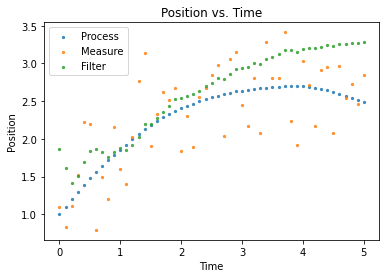

In [9]:
sz = 5
a = 0.8
plt.scatter(np.arange(0, (t + 1) * dt,dt), process[0], s=sz, alpha=a)
plt.scatter(np.arange(0, (t + 1) * dt, dt), measure[0], s=sz, alpha=a)
plt.scatter(np.arange(0, (t + 1) * dt, dt), output[0], s=sz, alpha=a)
plt.title("Position vs. Time")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend(["Process","Measure","Filter"])

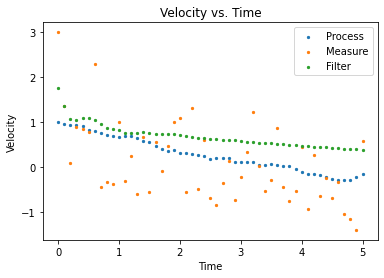

In [10]:
plt.scatter(np.arange(0, (t + 1) * dt, dt), process[1], s=sz)
plt.scatter(np.arange(0, (t + 1) * dt, dt), measure[1], s=sz)
plt.scatter(np.arange(0, (t + 1) * dt, dt), output[1], s=sz)
plt.title("Velocity vs. Time")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.legend(["Process","Measure","Filter"])

In [16]:
np.random.normal(scale=1, size = (2,1))

(2, 1)